## Pairs Bootstrapping and Regression Analysis

The dataset source is from kaggle of James Loh entitled "Automobiles".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

### 1. Data Cleaning

In [2]:
df = pd.read_csv('Automobile.csv')

In [3]:
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [4]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [5]:
df.shape

(398, 9)

In [6]:
df.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.isna().sum() # missing values

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
df =  df.dropna()
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

### 2. Exploratory Data Analysis

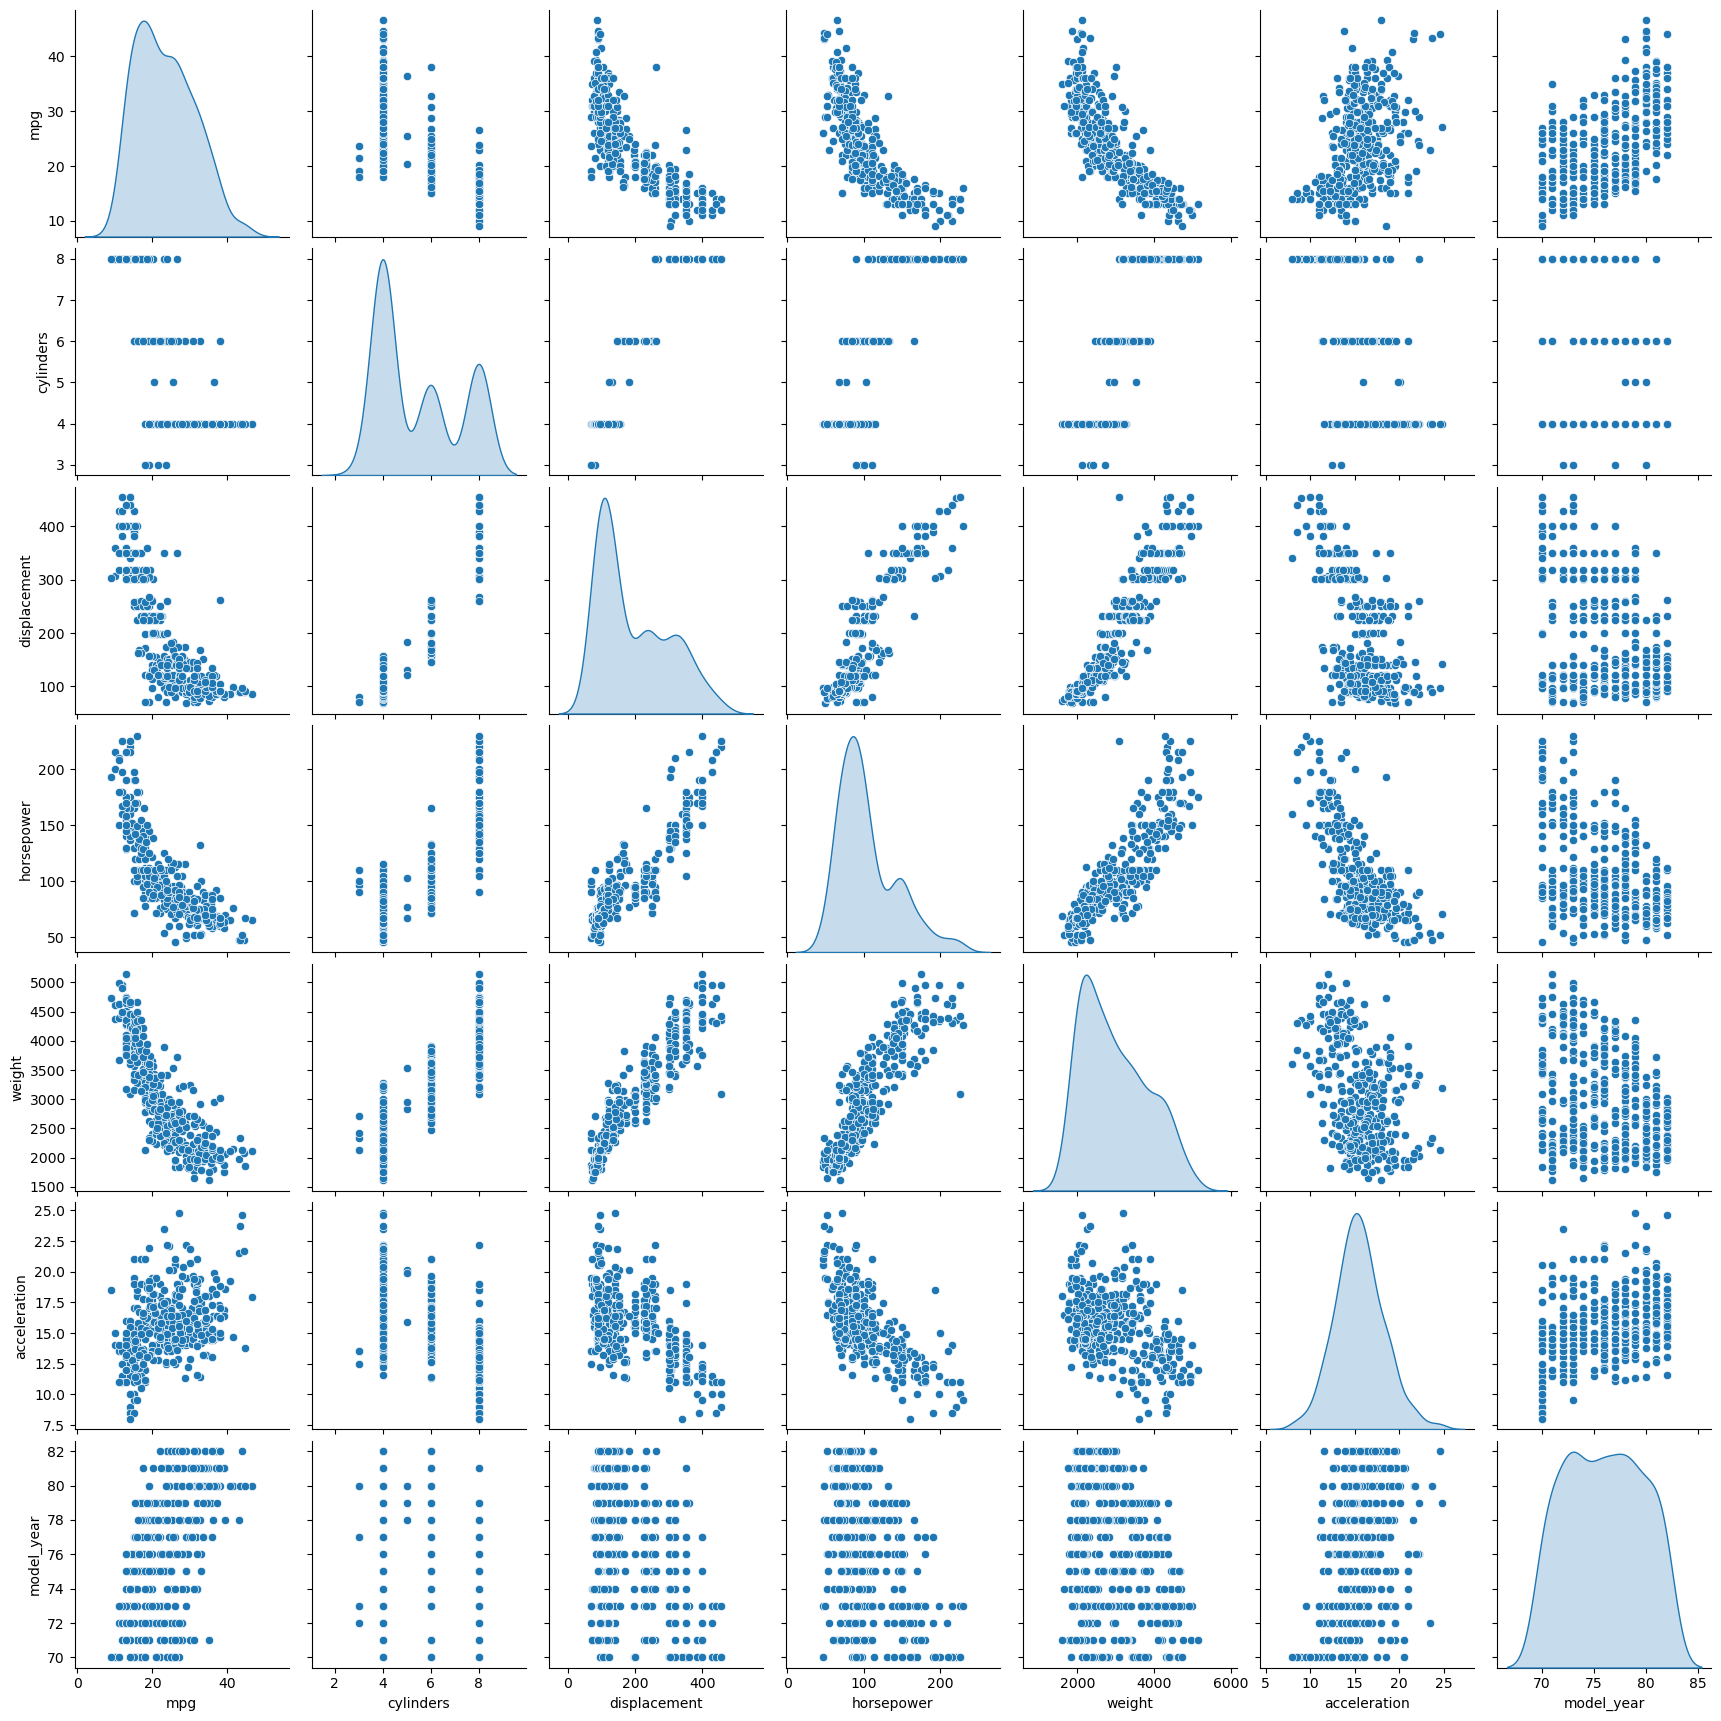

In [10]:
# Visualization plotting for the dataset's relationship and distribution
sns.pairplot(df, diag_kind='kde')
plt.show()

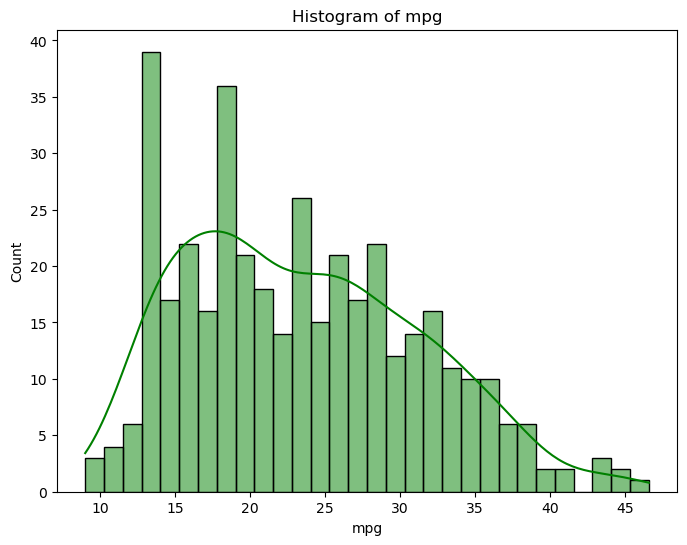

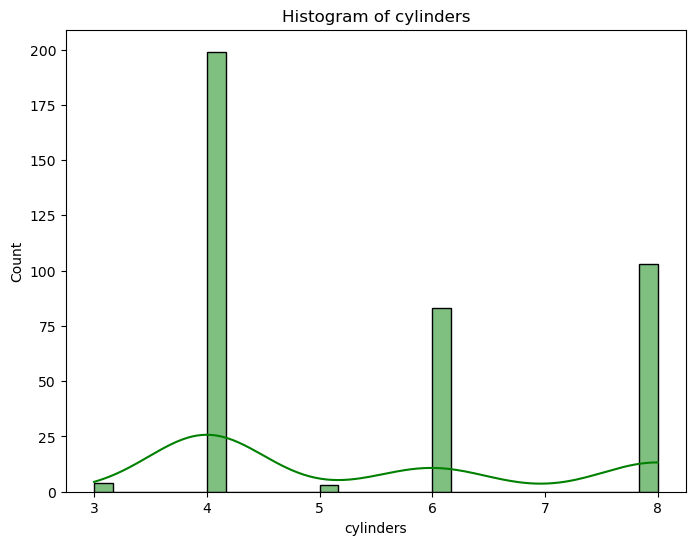

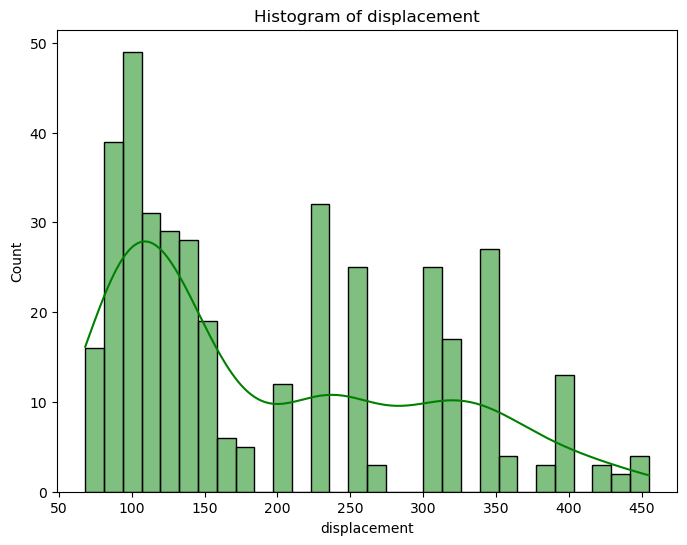

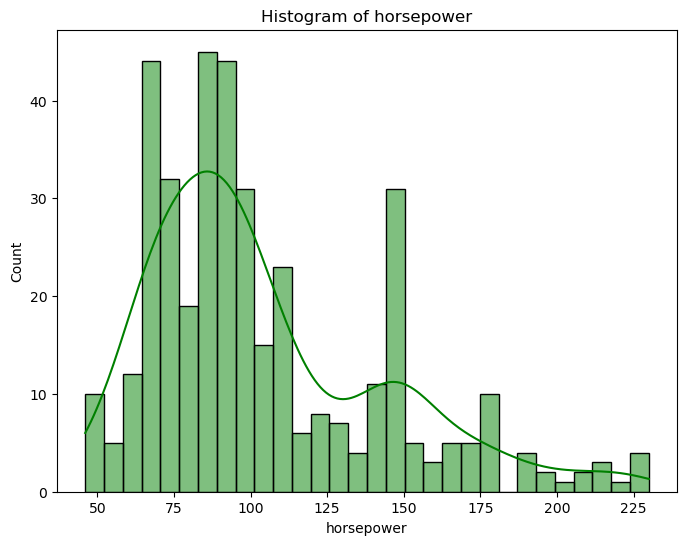

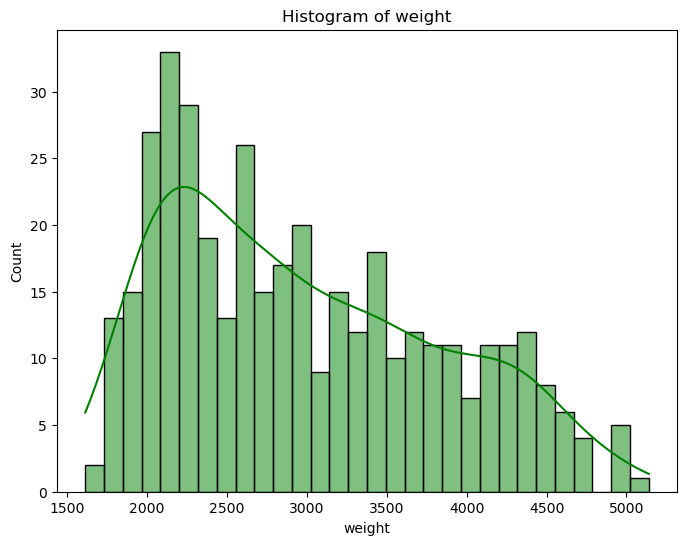

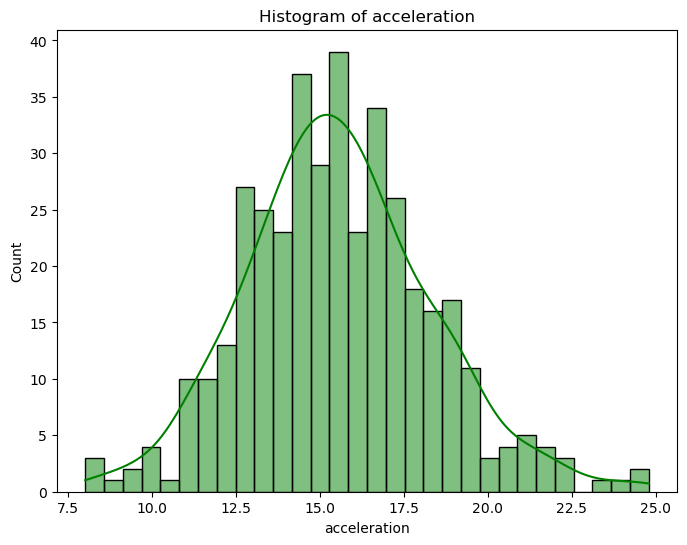

In [11]:
# Histogram Numerical Variables
numerical_var = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration']

for column in numerical_var:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True, color='green')
    plt.title(f'Histogram of {column}')
    plt.show()

Text(0.5, 1.0, 'Displacement Count')

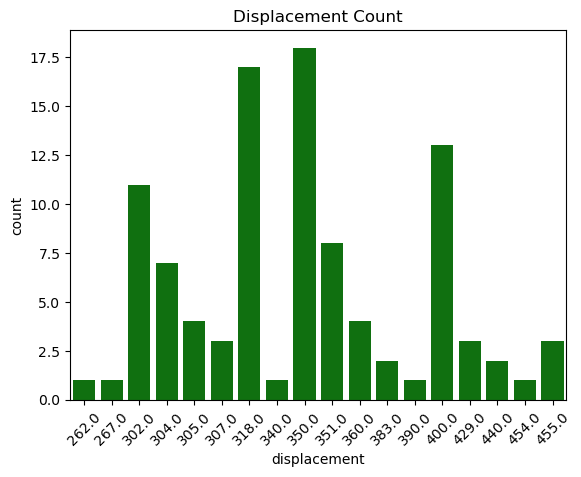

In [12]:
# Displacement Count
sort_count = df.sort_values(by = 'displacement',ascending = False)
sns.countplot(x = sort_count['displacement'].head(100), color='green')
plt.xticks(rotation = 45)
plt.title('Displacement Count')

Text(0.5, 1.0, 'Horsepower Count')

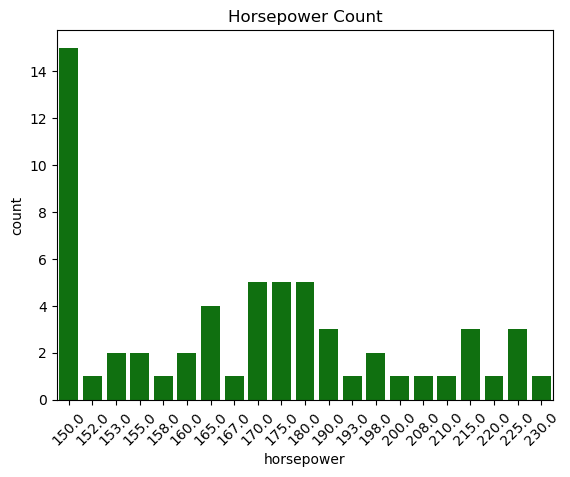

In [13]:
# Horsepower Count
sort_count = df.sort_values(by = 'horsepower',ascending = False)
sns.countplot(x = sort_count['horsepower'].head(60), color='green')
plt.xticks(rotation = 45)
plt.title('Horsepower Count')

C:\Users\Sydney\AppData\Local\Temp\ipykernel_1000\439408035.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


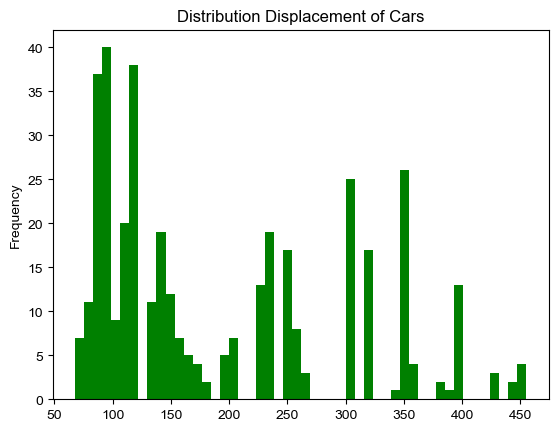

In [14]:
# Visualization of Distribution 
df['displacement'].plot(kind = 'hist', bins = 50, color='green') 
plt.title('Distribution Displacement of Cars')
plt.style.use('seaborn')

C:\Users\Sydney\AppData\Local\Temp\ipykernel_1000\109488223.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


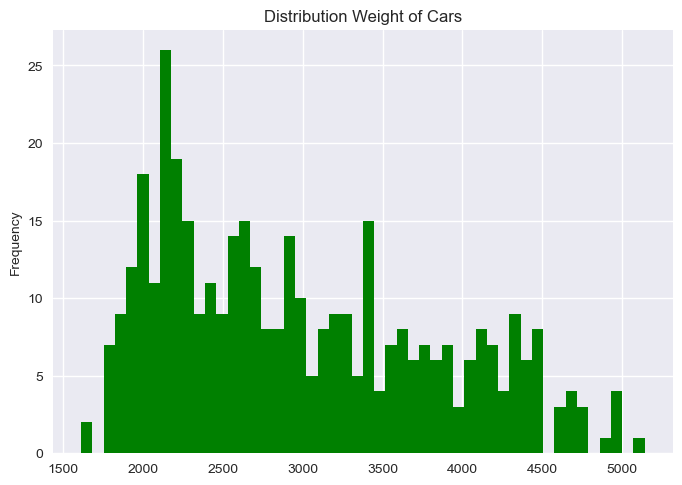

In [15]:
# Visualization of Distribution 
df['weight'].plot(kind = 'hist', bins = 50, color='green') 
plt.title('Distribution Weight of Cars')
plt.style.use('seaborn')

C:\Users\Sydney\AppData\Local\Temp\ipykernel_1000\1042499127.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


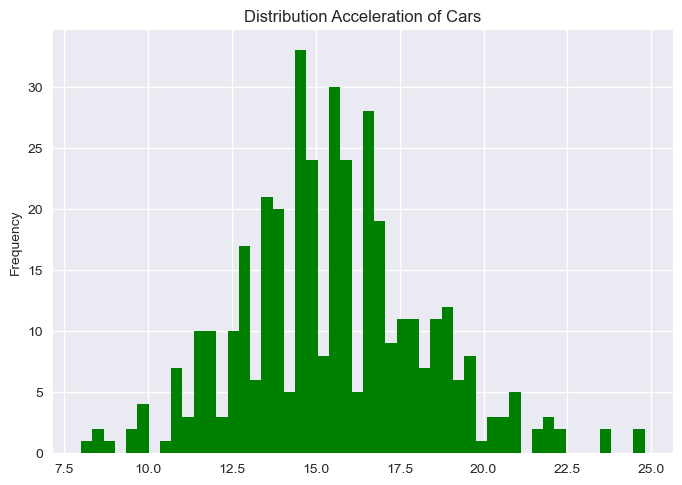

In [16]:
# Visualization of Distribution 
df['acceleration'].plot(kind = 'hist', bins = 50, color='green') 
plt.title('Distribution Acceleration of Cars')
plt.style.use('seaborn')

Text(0.5, 1.0, 'Count of Model by Origin')

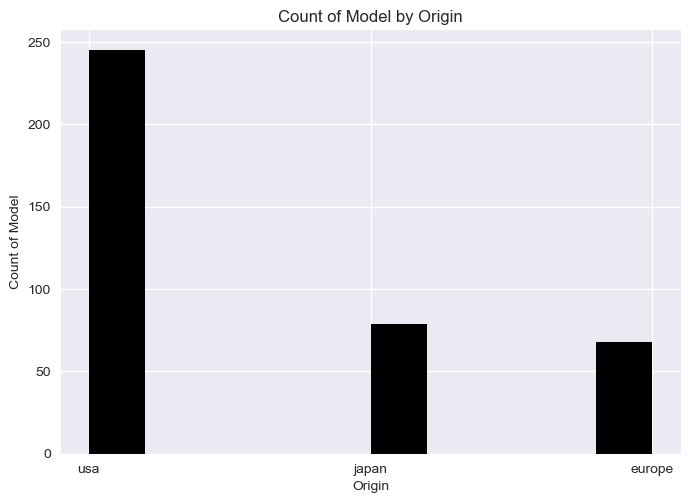

In [17]:
# Visualization of Count of Model by Origin 
plt.hist(df.origin, color='black')
plt.xlabel('Origin')
plt.ylabel('Count of Model')
plt.title('Count of Model by Origin')

Text(0.5, 1.0, 'Count of Model by Origin with its count of cylinders')

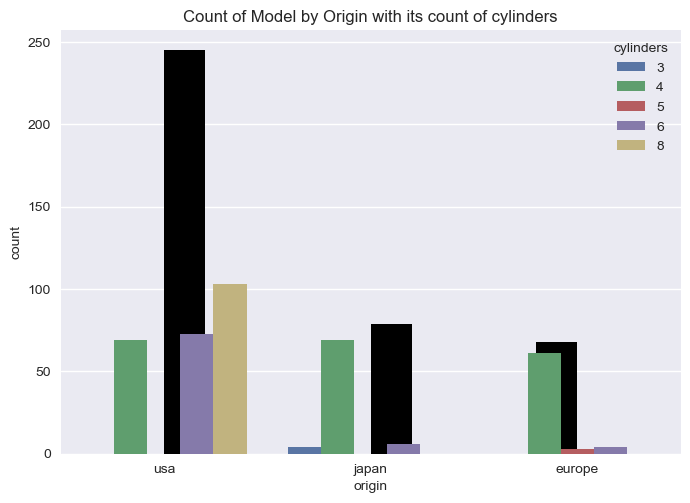

In [18]:
# Visualization of the types of cylinders are found in each origin 
plt.hist(df.origin, color='black')
sns.countplot(data=df,x='origin',hue='cylinders')
plt.title('Count of Model by Origin with its count of cylinders')

Text(0.5, 1.0, 'mpg Distribution of by origin')

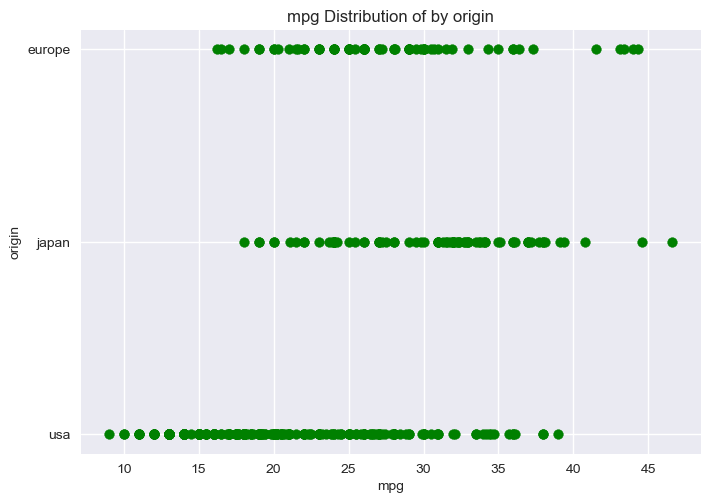

In [19]:
# Visualization of the mpg per origin
plt.scatter(df.mpg,df.origin, color='green') 
plt.xlabel('mpg')
plt.ylabel('origin')
plt.title('mpg Distribution of by origin')

C:\Users\Sydney\AppData\Local\Temp\ipykernel_1000\3108813535.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


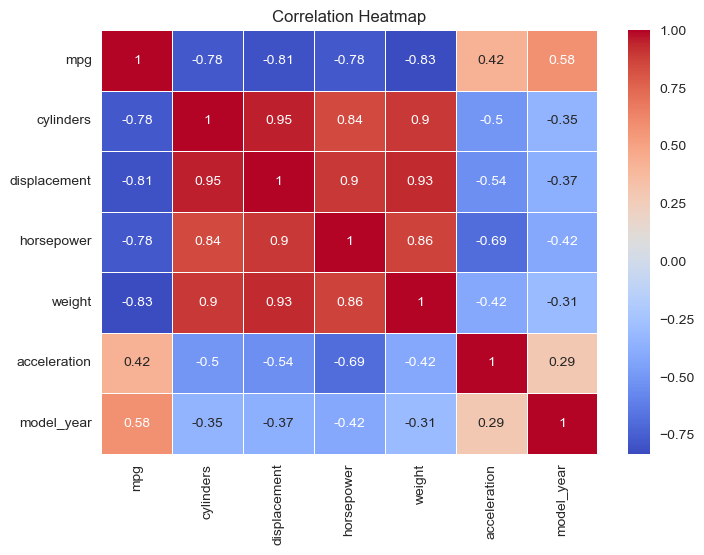

In [20]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Short Discussion: 

  Based on the graph of "mpg Distribution of by origin", Europe and Japan cars exhibit more fuel efficiency than USA cars. 
    
  Based on the graph of "Count of Model by Origin with its count of cylinders", 4 cylinder engine is most known or utilized in the three origin, USA, Europe, and Japan. However, America tend to prefer the 8 cylinder engine with it being the highest count in USA.

### 3. Pairs Bootstrapping 

In [21]:
def get_bootstrap_data(data: np.array, size: int) -> np.array:
    x_shape = size
    y_shape = data.size
    
    if size > 1:
        bs_data = np.random.choice(data, size=(x_shape, y_shape))
    else:
        bs_data = np.random.choice(data, size=y_shape)
        
    return bs_data

In [22]:
sample_data = df[df['origin'] == 'usa']
sample_data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [23]:
BOOTSTRAP_NUM_SAMPLES = 500

bootstrap_indices = get_bootstrap_data(sample_data.index, size=BOOTSTRAP_NUM_SAMPLES)
bootstrap_indices

array([[ 73,  46, 316, ..., 188, 215, 187],
       [ 75, 199, 208, ..., 263, 288, 125],
       [ 85, 295, 169, ...,  63, 389,  33],
       ...,
       [ 66, 307,  43, ..., 230,  49,  45],
       [395, 188,  58, ...,  45, 137, 106],
       [ 58, 397, 115, ..., 288, 288, 251]], dtype=int64)

In [24]:
bootstrap_indices.shape

(500, 245)

In [25]:
mpg_data = np.vectorize(lambda x: sample_data['mpg'][x])
acceleration_data = np.vectorize(lambda x: sample_data['acceleration'][x])

In [26]:
mpg_bs_data = mpg_data(bootstrap_indices)
acceleration_bs_data = acceleration_data(bootstrap_indices)

In [27]:
mpg_bs_data

array([[13. , 22. , 19.1, ..., 16. , 13. , 17.5],
       [14. , 20. , 13. , ..., 17.7, 18.2, 20. ],
       [13. , 35.7, 20. , ..., 14. , 22. , 19. ],
       ...,
       [17. , 26.8, 13. , ..., 15.5, 23. , 18. ],
       [32. , 16. , 25. , ..., 18. , 13. , 12. ],
       [25. , 31. , 15. , ..., 18.2, 18.2, 20.2]])

In [28]:
acceleration_bs_data

array([[14. , 19. , 18.7, ..., 13. , 14. , 13. ],
       [14. , 17.7, 13.2, ..., 13.4, 15.2, 16.5],
       [13. , 14.4, 16. , ..., 12. , 14.7, 13. ],
       ...,
       [11.5, 12.9, 12. , ..., 11.4, 14. , 13.5],
       [11.6, 13. , 17. , ..., 13.5, 14.5, 12.5],
       [17. , 19.4, 13. , ..., 15.2, 15.2, 12.8]])

In [29]:
bs_slopes = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(mpg_bs_data[i], acceleration_bs_data[i], deg=1)
    bs_slopes[i] = slope
    bs_intercepts[i] = intercept

In [30]:
original_slope, original_intercept = np.polyfit(sample_data['mpg'], sample_data['acceleration'], deg=1)

Text(0.5, 1.0, 'Regression Fitting with Bootstrap Estimation')

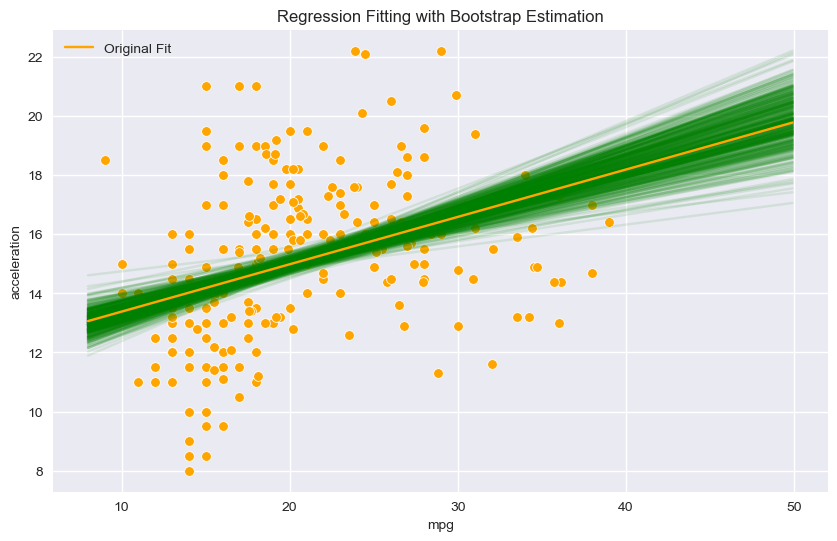

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

x_data = np.arange(8, 50, 0.1)

for slope, intercept in zip(bs_slopes, bs_intercepts):
    sns.lineplot(x=x_data, y=slope*x_data+intercept, alpha=0.1, errorbar=None, color='green', ax=ax)
    
sns.lineplot(x=x_data, y=original_slope*x_data+original_intercept, errorbar=None, color='orange', label='Original Fit', ax=ax)
sns.scatterplot(data=sample_data, x='mpg', y='acceleration', color='orange', ax=ax)

ax.legend()

ax.set_xlabel('mpg')
ax.set_ylabel('acceleration')
ax.set_title('Regression Fitting with Bootstrap Estimation')

In [32]:
disp_data = np.vectorize(lambda x: sample_data['displacement'][x])
horse_data = np.vectorize(lambda x: sample_data['horsepower'][x])

displacement_bs_data = disp_data(bootstrap_indices)
horsepower_bs_data = horse_data(bootstrap_indices)

In [33]:
displacement_bs_data

array([[307. , 140. , 225. , ..., 318. , 318. , 305. ],
       [318. , 225. , 318. , ..., 231. , 318. , 198. ],
       [350. ,  98. , 232. , ..., 400. , 232. , 232. ],
       ...,
       [304. , 173. , 400. , ..., 350. , 122. , 258. ],
       [135. , 318. ,  97.5, ..., 258. , 350. , 350. ],
       [ 97.5, 119. , 350. , ..., 318. , 318. , 302. ]])

In [34]:
horsepower_bs_data

array([[130.,  72.,  90., ..., 150., 150., 140.],
       [150., 100., 150., ..., 165., 135.,  95.],
       [175.,  80., 100., ..., 175., 112., 100.],
       ...,
       [150., 115., 170., ..., 170.,  86., 110.],
       [ 84., 150.,  80., ..., 110., 150., 180.],
       [ 80.,  82., 145., ..., 135., 135., 139.]])

In [35]:
bs_slopes = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(displacement_bs_data[i], horsepower_bs_data[i], deg=1)
    bs_slopes[i] = slope
    bs_intercepts[i] = intercept

In [36]:
original_slope, original_intercept = np.polyfit(sample_data['displacement'], sample_data['horsepower'], deg=1)

Text(0.5, 1.0, 'Regression Fitting with Bootstrap Estimation')

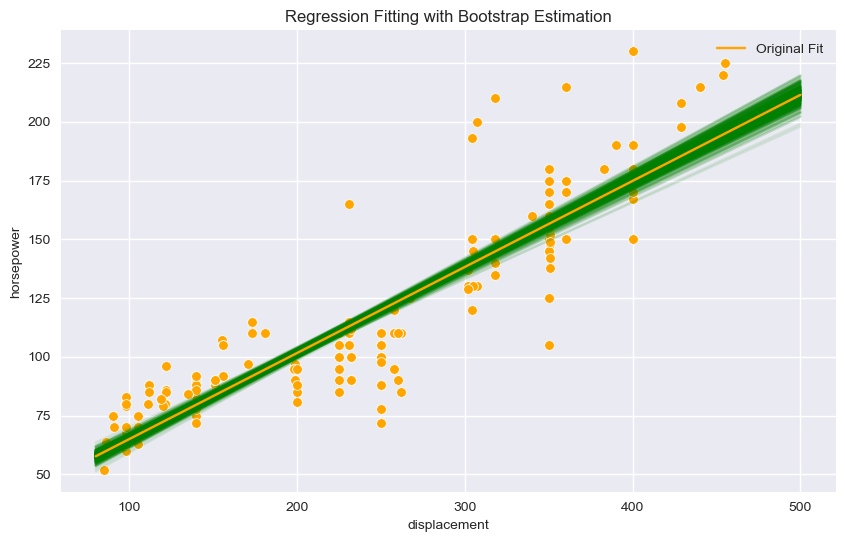

In [37]:
fig, ax = plt.subplots(figsize=(10,6))

x_data = np.arange(80, 500, 0.1)

for slope, intercept in zip(bs_slopes, bs_intercepts):
    sns.lineplot(x=x_data, y=slope*x_data+intercept, alpha=0.1, errorbar=None, color='green', ax=ax)
    
sns.lineplot(x=x_data, y=original_slope*x_data+original_intercept, errorbar=None, color='orange', label='Original Fit', ax=ax)
sns.scatterplot(data=sample_data, x='displacement', y='horsepower', color='orange', ax=ax)

ax.legend()

ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_title('Regression Fitting with Bootstrap Estimation')

### 4. Regression Analysis

In [38]:
pip install datascience

In [39]:
from datascience import Table
import numpy as np
import matplotlib.pyplot as plots
import scipy as sp
%matplotlib inline
import statsmodels.formula.api as smf
plots.style.use('fivethirtyeight')

In [40]:
data = Table.read_table('Automobile.csv')  # Imports the data and creates a table
data.show(1)  # Displays the first five rows of the table

name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
chevrolet chevelle malibu,18,8,307,130,3504,12,70,usa


In [41]:
mod = smf.ols(formula='mpg ~ acceleration', data=data.to_df())
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.82e-18
Time:                        17:05:35   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.9698      2.043      2.432   

In [42]:
df = pd.read_csv('Automobile.csv')

mpg = df['mpg'].values
acceleration = df['acceleration'].values

mean_mpg = np.mean(mpg)
mean_acceleration = np.mean(acceleration)

slope_acceleration, intercept_acceleration, r_value_acceleration, p_value_acceleration, std_err_acceleration = scipy.stats.linregress(acceleration, mpg)
linear_regression_equation_acceleration = f'mpg = {intercept_acceleration:.2f} + {slope_acceleration:.2f} * acceleration'

print(f"The intercept is {intercept_acceleration:.2f}")
print(f"The slope is {slope_acceleration:.2f}")
print(f"The Linear Regression equation: {linear_regression_equation_acceleration}")

The intercept is 4.97
The slope is 1.19
The Linear Regression equation: mpg = 4.97 + 1.19 * acceleration


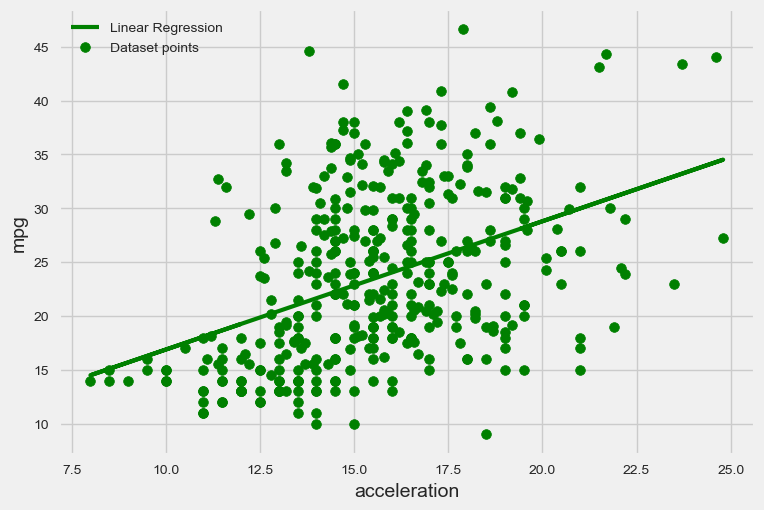

In [43]:
fig, ax = plt.subplots()
ax.plot(df['acceleration'], intercept_acceleration + slope_acceleration * df['acceleration'], linewidth=3, label="Linear Regression", color='green')
ax.scatter(df['acceleration'], df['mpg'], label='Dataset points', color='green')
ax.set_xlabel('acceleration')
ax.set_ylabel('mpg')
ax.legend(facecolor='black')
plt.show()

#### Short Discussion: 

The increase movement of acceleration, corresponds to an upward trend. Hence, when the acceleration increase the mpg also increases, stating that mpg and acceleration is directly proportional. This implies that when a car accelerates, an expected fuel efficiency occurs because it experiences improves miles per gallon. 

---